# 🏡 House Price Prediction using Regression
**Dataset**: King County, USA  
**Objective**: Predict house sale prices using regression models based on features such as square footage, number of bedrooms, floors, and more.
# By Pratishtha Srivastava 

## 📦 Step 1: Import Required Libraries

We start by importing the necessary Python libraries for data analysis, visualization, and modeling.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 📂 Step 2: Load the Dataset

We load the `kc_house_data.csv` file using pandas. This dataset contains information on house sales in King County, USA.


In [47]:
#Load datase
df = pd.read_csv("kc_house_data.csv")

#Display first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 📋 Step 3: Display Data Types of Each Column

We use the `.dtypes` attribute to check the data type of each column in the dataset.
This helps us understand which columns are numerical, categorical, or object types.


In [48]:
# Display data types of each column
df.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 🧹 Step 4: Check for Missing Values

Before analysis, we must check if any column contains missing or null values. Missing values can negatively impact model performance.


In [49]:
#Check missing or null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 🧹 Step 5: Drop Unnecessary Column and View Statistical Summary

In this dataset version, only the `"id"` column exists and is dropped.  
We then display summary statistics using `.describe()`.


In [50]:
# Drop columns "id" and "Unnamed: 0"
df.drop(["id"], axis=1, inplace=True)

# Display statistical summary
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 🏢 Step 6: Count Unique Floor Values

We count the number of houses based on their number of floors using `.value_counts()`  
and convert the result into a DataFrame with `.to_frame()`.


In [51]:
# count unique floors and convert to dataframe
floor_count = df["floors"].value_counts().to_frame

#display result 

floor_count

<bound method Series.to_frame of floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64>

## 🌊 Step 7: Boxplot – Waterfront vs House Price

We use a boxplot to analyze how the presence of a waterfront affects house prices.  
Boxplots are great for identifying the distribution and outliers.


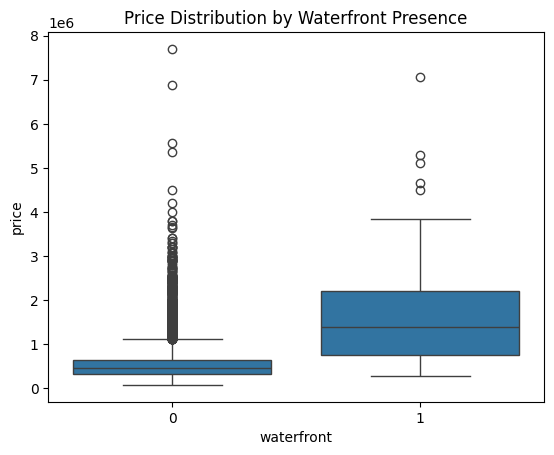

In [52]:
# Create a boxplot for waterfront vs price
plt.Figure(figsize=(8 , 5))
sns.boxplot( x='waterfront', y = 'price', data=df)

#Adds label and title 

plt.title('Price Distribution by Waterfront Presence')
plt.xlabel('waterfront')
plt.ylabel('price')
plt.show()

## 📈 Step 8: Regression Plot – sqft_above vs Price

We use Seaborn’s `regplot()` to visualize the linear relationship between `sqft_above` (above ground square footage) and `price`.


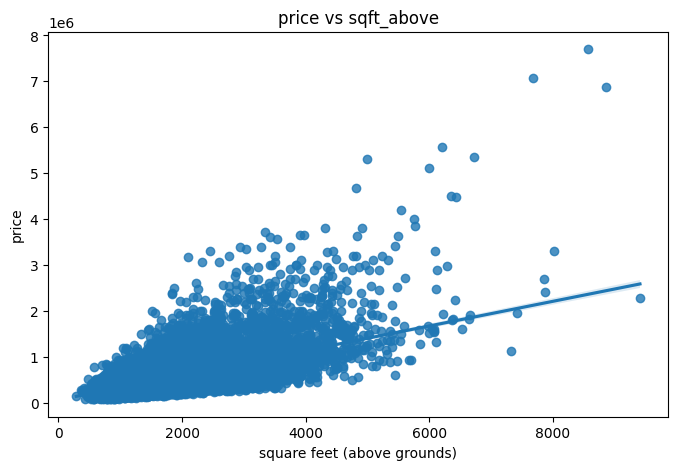

In [53]:
#creating regplot
plt.figure(figsize=(8,5))
sns.regplot(x='sqft_above', y = 'price', data=df)

#add title and label

plt.title('price vs sqft_above')
plt.xlabel('square feet (above grounds)')
plt.ylabel('price')
plt.show()

## 🤖 Step 9: Simple Linear Regression – sqft_living vs Price

We train a linear regression model using only one feature: `sqft_living`.  
Then, we evaluate model performance using the R² (coefficient of determination).


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
#This imports the function that calculates the R² score — a metric that tells us how well the model explains the variance in the target variable (price).

# Reshape input to be 2D (required for sklearn)
X = df[['sqft_living']]
y = df['price']

#train model
lm = LinearRegression()
lm.fit(X,y)

# Predict using the model
y_pred = lm.predict(X)

# Calculate R²
r2 = r2_score(y,y_pred)

#This line calculates the R² score, which tells us how well the model’s predictions match the actual prices.
# R² ranges from 0 to 1:
# 1.0 = perfect prediction
# 0.0 = no predictive power


# Print R² value
print("R² Score:", r2)

R² Score: 0.4928532179037931


## 🧠 Final Step: Multiple Linear Regression with 11 Features

We use a more detailed set of 11 relevant features to train our model and predict house prices.  
This should give us a better fit compared to single-feature models.


In [55]:
# Step 1: Define selected features and target
selected_features = [
    'floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement',
    'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living'
]

X_final = df[selected_features]
y_final = df['price']

# Step 2: Create and train the model
final_model = LinearRegression()
final_model.fit(X_final, y_final)

# Step 3: Predict prices
y_final_pred = final_model.predict(X_final)

# Step 4: Evaluate model with R² score
r2_final = r2_score(y_final, y_final_pred)
print("R² Score (Final Model with 11 Features):", r2_final)


R² Score (Final Model with 11 Features): 0.6577151058279326


## 🔁 Step 11: Polynomial Regression Pipeline

We create a pipeline that:
- Standardizes the features
- Generates polynomial features (degree=2)
- Fits a Linear Regression model

We evaluate the model using the R² score.


In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#define features
X_poly = df[selected_features]
y_poly = df['price']

# generate pipeline
pipe = Pipeline([
    ('scale',StandardScaler()),                        # Step 1: scale features
    ('poly', PolynomialFeatures(degree=2)),            # Step 2: generate polynomial terms
    ('model', LinearRegression())                      # Step 3: linear regression model
])

#fit the pipeline to the data
pipe.fit(X_poly , y_poly)

#predict and evaluate
y_poly_pred= pipe.predict(X_poly)
r2_poly = r2_score(y_poly_pred, y_poly)

# Output the R² Score
print("R² Score (Polynomial Regression Pipeline):", r2_poly)




R² Score (Polynomial Regression Pipeline): 0.6690566250585108


## 🧱 Step 12: Ridge Regression with Regularization (α = 0.1)

We train a Ridge Regression model using a regularization strength of 0.1.  
The dataset is split into training and test sets to evaluate model performance on unseen data using R² score.


In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Step 1: Define features and target
X_ridge = df[selected_features]
y_ridge = df['price']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_ridge, y_ridge, test_size=0.2, random_state=42)

# Step 3: Create Ridge model with alpha=0.1
ridge_model = Ridge(alpha=0.1)

# Step 4: Fit the model on training data
ridge_model.fit(X_train, y_train)

# Step 5: Predict on test data
y_test_pred = ridge_model.predict(X_test)

# Step 6: Calculate R² score on test set
r2_ridge = r2_score(y_test, y_test_pred)
print("R² Score (Ridge Regression, alpha=0.1):", r2_ridge)

 

R² Score (Ridge Regression, alpha=0.1): 0.6614734596866666


## 🧠 Step 13: Polynomial (Degree 2) + Ridge Regression (α = 0.1)

We apply a 2nd-degree polynomial transformation to the features,  
then train a Ridge Regression model to predict house prices,  
and evaluate it using the R² score on the test set.


In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Feature and target selection
X = df[selected_features]
y = df['price']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Polynomial transformation (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 4: Ridge regression with regularization
ridge_poly_model = Ridge(alpha=0.1)
ridge_poly_model.fit(X_train_poly, y_train)

# Step 5: Predict on test set
y_poly_pred = ridge_poly_model.predict(X_test_poly)

# Step 6: Evaluate using R² score
r2_poly_ridge = r2_score(y_test, y_poly_pred)
print("R² Score (Polynomial + Ridge, α = 0.1):", r2_poly_ridge)


R² Score (Polynomial + Ridge, α = 0.1): 0.7003486874025674


### 📊 Model Comparison Summary

The best performance was achieved using Polynomial + Ridge Regression (α=0.1),  
indicating that the relationship between features and house prices is nonlinear  
and benefits from regularization to avoid overfitting.
